In [1]:
import os

import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
radix = 2
aqi_covid_dir = '../aim5/aim5_output/'
correlations_csv = '../aim5/correlations.csv'
cities = ['Brajrajnagar', 'Bengaluru', 'Mumbai', 'Delhi', 'Patna',
          'Thiruvananthapuram', 'Amritsar', 'Coimbatore', 'Pithampur',
          'Lucknow', 'Kolkata', 'Talcher', 'Ujjain', 'Ahmedabad',
          'Visakhapatnam', 'Jaipur', 'Hyderabad', 'Chennai']

In [3]:
aqi_covid_dfs = dict()   # hold the dataframe for all the cities
rank_diffs = dict()      # hold diff between AQI and Cases for all the cities
for file in cities:
    df = pd.read_csv(os.path.join(aqi_covid_dir, f'{file}.csv'))
    rank_diffs[file] = np.array(df['AQI'].rank() - df['Cases'].rank())
    aqi_covid_dfs[file] = df

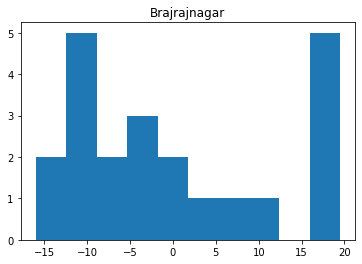

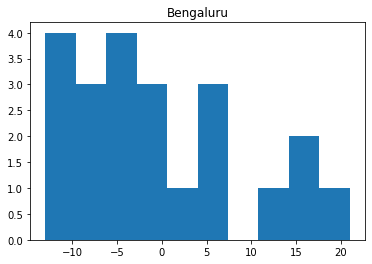

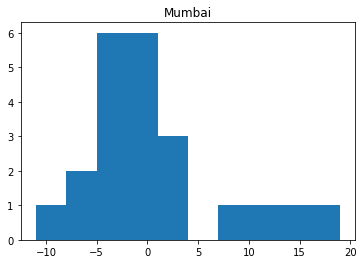

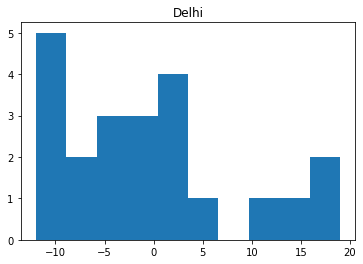

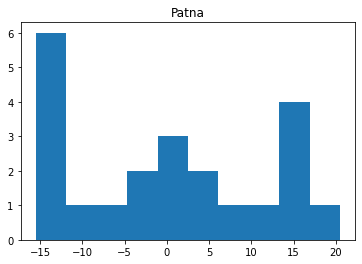

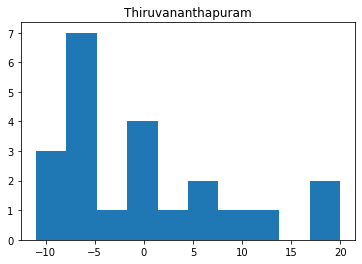

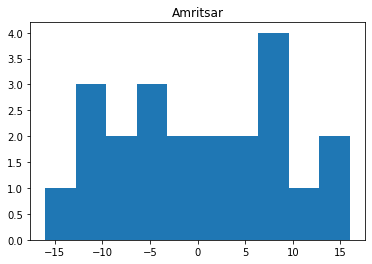

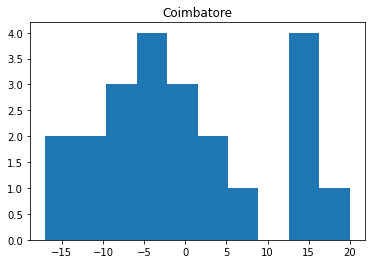

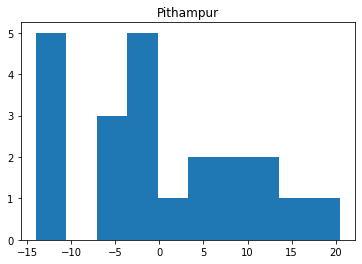

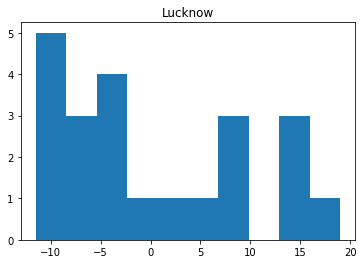

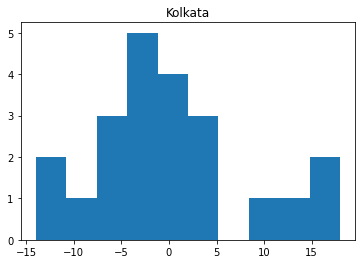

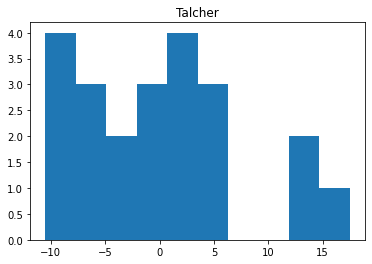

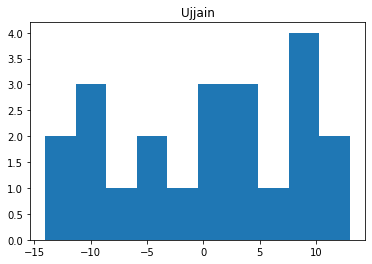

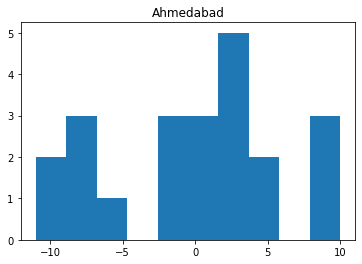

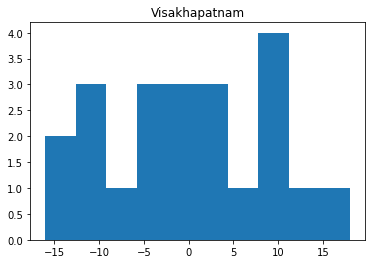

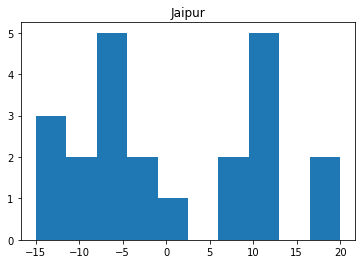

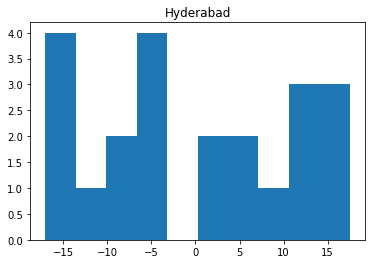

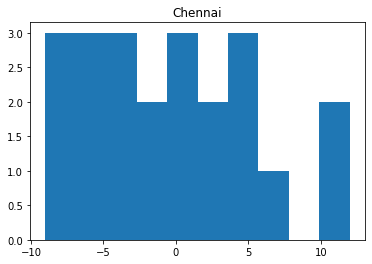

In [4]:
# plot histogram on rank difference(just for visualization)
for diff in rank_diffs:
    plt.hist(rank_diffs[diff])
    plt.title(diff)
    plt.show()

In [5]:
variances = []    # create an array of variances for all cities rank differences
for diff in rank_diffs:
    v = rank_diffs[diff].var()
    print('{0:{1}.{2}f}'.format(v, radix+1+3, radix), diff)
    variances.append(v)

print('\nmean of variances: {0:.{1}f}'.format(np.array(variances).mean(), radix))

122.75 Brajrajnagar
 95.36 Bengaluru
 50.09 Mumbai
 78.45 Delhi
130.95 Patna
 72.82 Thiruvananthapuram
 81.68 Amritsar
103.77 Coimbatore
 95.36 Pithampur
 81.34 Lucknow
 73.75 Kolkata
 58.50 Talcher
 70.11 Ujjain
 36.55 Ahmedabad
 88.91 Visakhapatnam
119.45 Jaipur
121.91 Hyderabad
 31.82 Chennai

mean of variances: 84.09


In [6]:
def corr(tdf, method):
    d = tdf.corr(method=method)
    assert d['AQI']['Cases'] == d['Cases']['AQI']
    return round(d['AQI']['Cases'], radix)

In [7]:
# print correlations for kendall and spearman foe all cities

correlations = []
for file in cities:
    tdf = pd.read_csv(os.path.join(aqi_covid_dir, f'{file}.csv'))
    k, s = corr(tdf, 'kendall'), corr(tdf, 'spearman')
    correlations.append((file, k, s))
correlations = pd.DataFrame(correlations, columns=['city', 'kendall', 'spearman'])
print(correlations)

                  city  kendall  spearman
0         Brajrajnagar    -0.37     -0.53
1            Bengaluru    -0.13     -0.18
2               Mumbai     0.28      0.38
3                Delhi     0.03      0.03
4                Patna    -0.45     -0.63
5   Thiruvananthapuram     0.05      0.09
6             Amritsar    -0.03     -0.02
7           Coimbatore    -0.18     -0.29
8            Pithampur    -0.15     -0.19
9              Lucknow     0.04     -0.01
10             Kolkata     0.07      0.08
11             Talcher     0.16      0.27
12              Ujjain     0.09      0.13
13           Ahmedabad     0.34      0.55
14       Visakhapatnam    -0.06     -0.10
15              Jaipur    -0.32     -0.48
16           Hyderabad    -0.39     -0.52
17             Chennai     0.45      0.60


In [8]:
# cities are manually classified into 2 labels(based on the rank differences)
# kendall is good with smaller rank difference, while spearman on large rank difference
kendall = ['Mumbai', 'Delhi', 'Thiruvananthapuram', 'Amritsar', 'Lucknow', 'Kolkata', 'Talcher', 'Ujjain', 'Ahmedabad', 'Visakhapatnam', 'Chennai']
spearman = ['Brajrajnagar', 'Bengaluru', 'Patna', 'Coimbatore', 'Pithampur', 'Jaipur', 'Hyderabad']


correlations = []
for file in cities:
    tdf = pd.read_csv(os.path.join(aqi_covid_dir, f'{file}.csv'))
    m = 'kendall' if file in kendall else 'spearman'
    correlations.append((file, corr(tdf, m), m))
correlations = pd.DataFrame(correlations, columns=['city', 'correlation', 'method'])
print(correlations)

                  city  correlation    method
0         Brajrajnagar        -0.53  spearman
1            Bengaluru        -0.18  spearman
2               Mumbai         0.28   kendall
3                Delhi         0.03   kendall
4                Patna        -0.63  spearman
5   Thiruvananthapuram         0.05   kendall
6             Amritsar        -0.03   kendall
7           Coimbatore        -0.29  spearman
8            Pithampur        -0.19  spearman
9              Lucknow         0.04   kendall
10             Kolkata         0.07   kendall
11             Talcher         0.16   kendall
12              Ujjain         0.09   kendall
13           Ahmedabad         0.34   kendall
14       Visakhapatnam        -0.06   kendall
15              Jaipur        -0.48  spearman
16           Hyderabad        -0.52  spearman
17             Chennai         0.45   kendall


In [9]:
correlations = correlations.sort_values('city')
correlations.to_csv(correlations_csv, index=False)